In [1]:
import os

In [2]:
os.chdir("../")
%pwd

'c:\\Users\\manob\\Documents\\Kidney_Disease_Detection\\Kidney_Disease_Detection'

In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from PIL import Image
import numpy as np
import pandas as pd


c:\Users\manob\Documents\Kidney_Disease_Detection\Kidney_Disease_Detection\.conda\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\manob\Documents\Kidney_Disease_Detection\Kidney_Disease_Detection\.conda\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\manob\Documents\Kidney_Disease_Detection\Kidney_Disease_Detection\.conda\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
# Paths
ROOT_DIR = "artifacts/data_ingestion/Combined_Training_Data"
CLASSES = ["Stone", "Non-Stone"]

In [5]:
def count_images():
    """Count number of images per class"""
    counts = []
    for class_name in CLASSES:
        folder = os.path.join(ROOT_DIR, class_name)
        count = len(os.listdir(folder)) if os.path.exists(folder) else 0
        counts.append({"Class": class_name, "Image Count": count})
    return pd.DataFrame(counts)

In [6]:
def plot_class_distribution(df):
    """Plot class-wise image count"""
    plt.figure(figsize=(6, 4))
    sns.barplot(data=df, x="Class", y="Image Count", hue="Class", palette="Set2", legend=False)
    plt.title("Image Distribution by Class")
    plt.tight_layout()
    plt.savefig("eda_class_distribution.png")
    plt.show()

In [7]:
def show_sample_images(class_name="Stone", n=6):
    """Show n sample images from a class"""
    folder = os.path.join(ROOT_DIR, class_name)
    images = os.listdir(folder)[:n]

    plt.figure(figsize=(15, 3))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path)
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_name)
    plt.suptitle(f"Sample Images - {class_name}")
    plt.tight_layout()
    plt.savefig(f"sample_{class_name}.png")
    plt.show()

In [8]:
def analyze_image_shapes():
    """Check common image shapes"""
    shape_counter = Counter()
    for class_name in CLASSES:
        folder = os.path.join(ROOT_DIR, class_name)
        for img_name in os.listdir(folder)[:100]:
            try:
                img = Image.open(os.path.join(folder, img_name))
                shape_counter[img.size + (len(img.getbands()),)] += 1
            except:
                continue

    print("Top image shapes:")
    for shape, count in shape_counter.most_common(5):
        print(f"Shape {shape} → {count} images")

In [9]:
def plot_image_resolution_distribution():
    """Plot width/height distributions"""
    widths, heights = [], []
    for class_name in CLASSES:
        folder = os.path.join(ROOT_DIR, class_name)
        for img_name in os.listdir(folder)[:200]:
            try:
                img = Image.open(os.path.join(folder, img_name))
                w, h = img.size
                widths.append(w)
                heights.append(h)
            except:
                continue

    plt.figure(figsize=(10, 4))
    sns.histplot(widths, color='skyblue', label='Width', kde=True)
    sns.histplot(heights, color='salmon', label='Height', kde=True)
    plt.title("Image Width and Height Distribution")
    plt.xlabel("Pixels")
    plt.legend()
    plt.tight_layout()
    plt.savefig("eda_resolution_distribution.png")
    plt.show()

In [10]:
def plot_aspect_ratios():
    """Plot aspect ratio (W/H) distribution"""
    ratios = []
    for class_name in CLASSES:
        folder = os.path.join(ROOT_DIR, class_name)
        for img_name in os.listdir(folder)[:200]:
            try:
                img = Image.open(os.path.join(folder, img_name))
                w, h = img.size
                ratios.append(round(w / h, 2))
            except:
                continue

    plt.figure(figsize=(8, 4))
    sns.histplot(ratios, bins=20, kde=True)
    plt.title("Aspect Ratio Distribution")
    plt.xlabel("Width / Height")
    plt.tight_layout()
    plt.savefig("eda_aspect_ratio.png")
    plt.show()

In [11]:
def check_corrupted_images():
    """List unreadable images"""
    corrupted = []
    for class_name in CLASSES:
        folder = os.path.join(ROOT_DIR, class_name)
        for img_name in os.listdir(folder):
            try:
                img = Image.open(os.path.join(folder, img_name))
                img.verify()
            except:
                corrupted.append(os.path.join(folder, img_name))
    print(f"Corrupted images found: {len(corrupted)}")
    for c in corrupted[:5]:
        print(" -", c)

In [12]:
def plot_brightness_histogram(class_name="Stone", sample_size=50):
    """Faster: Show pixel intensity histogram"""
    folder = os.path.join(ROOT_DIR, class_name)
    brightness = []

    for img_name in os.listdir(folder)[:sample_size]:
        try:
            img = Image.open(os.path.join(folder, img_name)).convert("L").resize((64, 64))
            brightness.extend(np.array(img).flatten())
        except:
            continue

    plt.figure(figsize=(8, 4))
    sns.histplot(brightness, bins=50, color='gray', kde=True)
    plt.title(f"Brightness Histogram - {class_name} ({sample_size} samples)")
    plt.xlabel("Pixel Intensity")
    plt.tight_layout()
    plt.savefig(f"brightness_{class_name}.png")
    plt.show()


       Class  Image Count
0      Stone        18194
1  Non-Stone        20627


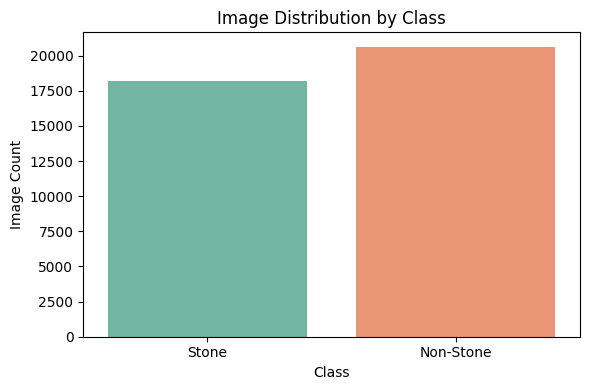

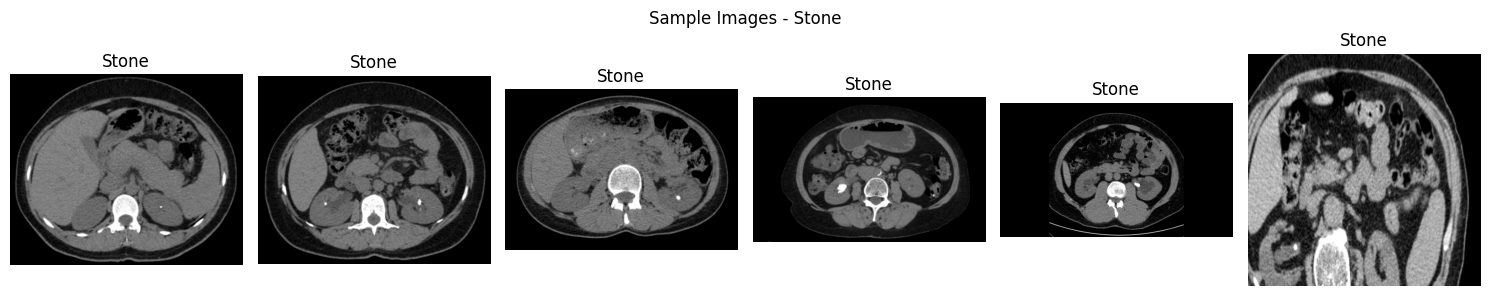

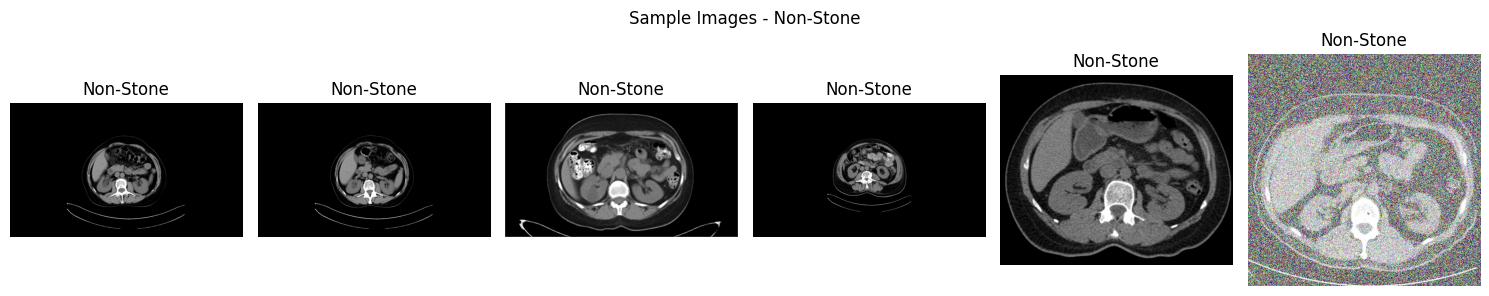

Top image shapes:
Shape (512, 512, 3) → 176 images
Shape (1275, 737, 3) → 12 images
Shape (717, 590, 4) → 1 images
Shape (737, 595, 4) → 1 images
Shape (688, 476, 4) → 1 images


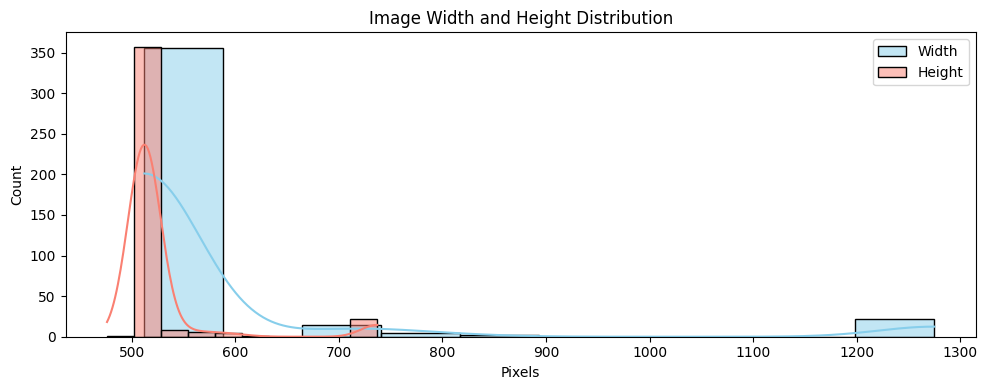

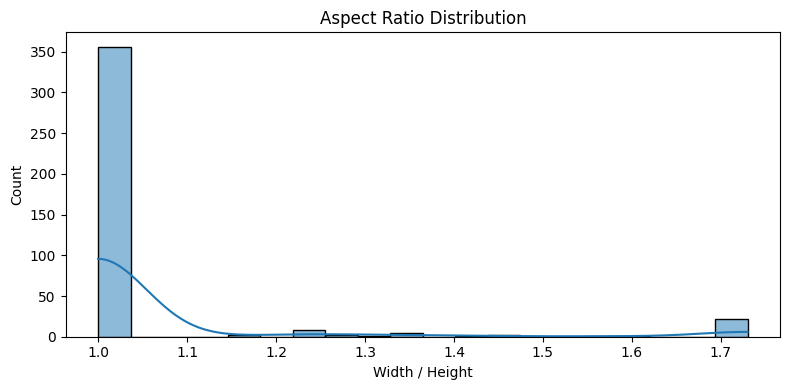

Corrupted images found: 0


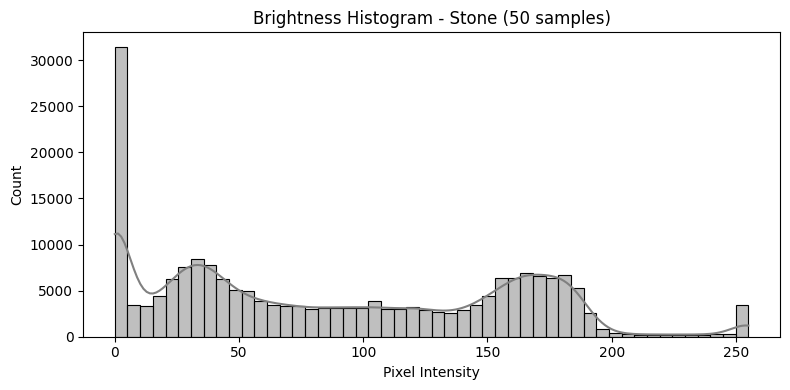

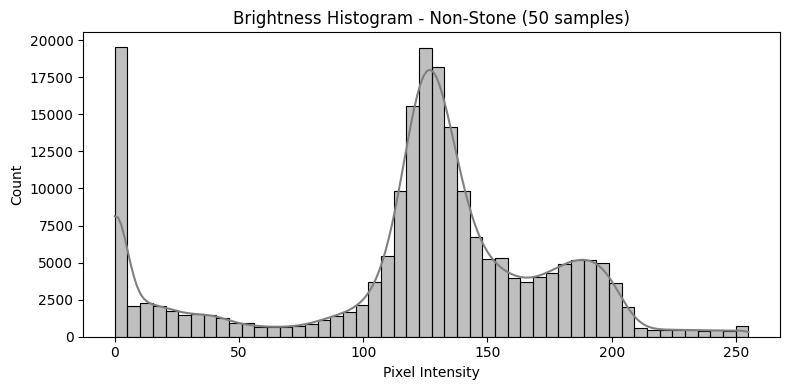

In [13]:
if __name__ == "__main__":
    df_counts = count_images()
    print(df_counts)

    plot_class_distribution(df_counts)
    show_sample_images("Stone")
    show_sample_images("Non-Stone")
    analyze_image_shapes()
    plot_image_resolution_distribution()
    plot_aspect_ratios()
    check_corrupted_images()
    plot_brightness_histogram("Stone", sample_size=50)
    plot_brightness_histogram("Non-Stone", sample_size=50)